In [1]:
using Gmsh: gmsh
using GridapGmsh
using Gridap
using Gridap.Geometry
using Gridap.TensorValues
using Plots

In [2]:
const T0 = 880
const TAppMax = 300
const TAppMin = 300
const delt = 1e-8
const tMax = 1e-6
const uMax = 1.2e-6
AppVel = uMax/tMax
uMin = 0
uTran = 1*uMax

1.2e-6

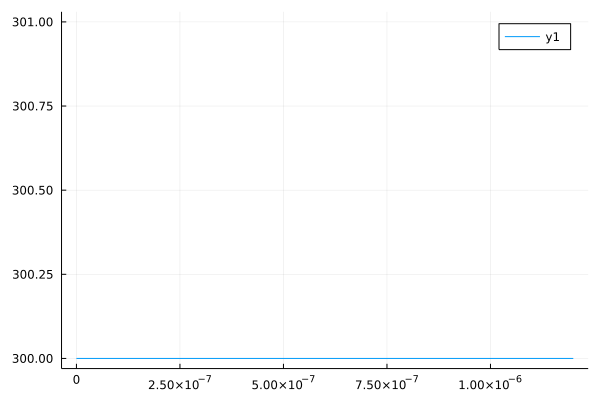

In [3]:
function Tfun(u)  
    if u <= uTran
      return ((TAppMax - TAppMin)/uTran)*u + TAppMin
    else
     return  TAppMax
    end
end 
plot(Tfun,0,uMax)

In [4]:
uAppVec = range(0,uMax,length = Int64(floor(tMax/delt)))

0.0:1.2121212121212122e-8:1.2e-6

In [5]:
TAppVec = Tfun.(uAppVec)

100-element Vector{Float64}:
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
   ⋮
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0

In [6]:
I2 = SymTensorValue{2,Float64}(1.0,0.0,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/2)*I4
I4_dev = I4_sym - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.5, 0.0, -0.5, 0.0, 0.5, 0.0, -0.5, 0.0, 0.5)

In [7]:
const L = 25e-3
const B = 4.9e-3
const lsp = (2*L)/200
const hf = lsp/5
const h = lsp/2

gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.geo.addPoint(0.0, B, 0.0, h, 1)  
gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h, 2) 
gmsh.model.geo.addPoint(L, 0.0, 0.0,h, 3) 
gmsh.model.geo.addPoint(L, 0.3*B, 0.0, h, 4)
gmsh.model.geo.addPoint(L, B, 0.0, h, 5)
gmsh.model.geo.addPoint(0.3*L, B, 0.0, h, 6)
gmsh.model.geo.addPoint(0.3*L, 0.3*B, 0.0, h, 7)

gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 5, 4)
gmsh.model.geo.addLine(5, 6, 5)
gmsh.model.geo.addLine(6, 1, 6)
gmsh.model.geo.addLine(6, 7, 7)
gmsh.model.geo.addLine(7, 4, 8)

gmsh.model.geo.addCurveLoop([1,2,3,4,5,6],1)


gmsh.model.geo.addCurveLoop([7,8,4,5],11)
gmsh.model.geo.addPlaneSurface([11], 11)
gmsh.model.geo.addPlaneSurface([1,-11], 1)

gmsh.model.addPhysicalGroup(2, [1,11],1)
gmsh.model.addPhysicalGroup(1, [3,4],1)
gmsh.model.addPhysicalGroup(1, [6,5],2)
gmsh.model.addPhysicalGroup(1, [1,2],3)
gmsh.model.setPhysicalName(2, 1, "Domain")
gmsh.model.setPhysicalName(1, 1, "VerticalSupport")
gmsh.model.setPhysicalName(1, 2, "HorizontalSupport")
gmsh.model.setPhysicalName(1, 3, "TempBoundary")

gmsh.model.mesh.field.add("Distance", 1)
gmsh.model.mesh.field.setNumbers(1, "CurvesList", [6,1,2,3,8,7])

gmsh.model.mesh.field.add("Threshold", 2)
gmsh.model.mesh.field.setNumber(2, "InField", 1)
gmsh.model.mesh.field.setNumber(2, "SizeMin", hf)
gmsh.model.mesh.field.setNumber(2, "SizeMax", h)
gmsh.model.mesh.field.setNumber(2, "DistMin", 0.2*B)
gmsh.model.mesh.field.setNumber(2, "DistMax", 0.4*B)

gmsh.model.mesh.field.setAsBackgroundMesh(2)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("Quenching880.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 70%] Meshing curve 6 (Line)
Info    : [ 80%] Meshing curve 7 (Line)
Info    : [ 90%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.00501204s, CPU 0.015625s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 50%] Meshing surface 11 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 1.8629s, CPU 1.85938s)
Info    : 44721 nodes 89866 elements
Info    : Writing 'Quenching880.msh'...
Info    : Done writing 'Quenching880.msh'


In [8]:
model = GmshDiscreteModel("Quenching880.msh")
writevtk(model,"Quenching880")

Info    : Reading 'Quenching880.msh'...
Info    : 17 entities
Info    : 44721 nodes
Info    : 89440 elements
Info    : Done reading 'Quenching880.msh'


3-element Vector{Vector{String}}:
 ["Quenching880_0.vtu"]
 ["Quenching880_1.vtu"]
 ["Quenching880_2.vtu"]

In [9]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

88463-element Vector{Int8}:
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 ⋮
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4

In [10]:
const Mat_tag = get_tag_from_name(labels,"Domain")

4

In [11]:
const E_mat = 340e9
const ν_mat = 0.22

0.22

#### Input fracture parameters

In [12]:
const Gc = 42.47
const η = 1e-8

1.0e-8

#### Input Thermal parameter 

In [13]:
const α = 8.0e-6
const c = 0.775
const κ_mat = 300.0
const ρ = 2450.0

2450.0

## Constitutive Matrices

### Elastic stiffness tensor

In [14]:
function ElasFourthOrderConstTensor(E ,ν , PlanarState)
# 1 for Plane Stress and 2 Plane Strain Condition
if PlanarState == 1
C1111 = E /(1 -ν *ν )
C1122 = (ν *E ) /(1 -ν *ν )
C1112 = 0.0
C2222 = E /(1 -ν *ν )
C2212 = 0.0
C1212 = E /(2*(1+ν ) )
elseif PlanarState == 2
C1111 = (E *(1 -ν *ν ) ) /((1+ν ) *(1 -ν -2*ν *ν ) )
C1122 = (ν *E ) /(1 -ν -2*ν *ν )
C1112 = 0.0
C2222 = (E *(1 -ν ) ) /(1 -ν -2*ν *ν )
C2212 = 0.0
C1212 = E /(2*(1+ν ) )
end
C_ten = SymFourthOrderTensorValue(C1111 , C1112 , C1122 , C1112 ,
C1212 , C2212 , C1122 , C2212 , C2222)
return C_ten
end

ElasFourthOrderConstTensor (generic function with 1 method)

In [15]:
const C_mat = ElasFourthOrderConstTensor(E_mat,ν_mat,1)

SymFourthOrderTensorValue{2, Float64, 9}(3.572929802437999e11, 0.0, 7.860445565363599e10, 0.0, 1.3934426229508197e11, 0.0, 7.860445565363599e10, 0.0, 3.572929802437999e11)

## Computation of temperature field

In [16]:
κGradTemp(∇,s_in) = κ_mat*∇

κGradTemp (generic function with 1 method)

In [17]:
σ_elas(εElas) = C_mat ⊙ εElas

σ_elas (generic function with 1 method)

In [18]:
function σ_elasMod(ε, ε_in, s_in,T,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElas = ε - α*(T-T0)*I2
    
 if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εElas)
  elseif tr(εElas_in) < 0
      σ = (s_in^2 + η) *I4_dev ⊙ σ_elas(εElas) + I4_vol⊙ σ_elas(εElas) 
  end  
    return σ
end

σ_elasMod (generic function with 1 method)

In [19]:
function σ_totMod(ε, ε_in,s_in,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElasTot = ε
    
 if tr(εElas_in)  >= 0
      σU = (s_in^2 + η)*σ_elas(εElasTot)
  elseif tr(εElas_in) < 0
      σU = (s_in^2 + η) *I4_dev ⊙ σ_elas(εElasTot) + I4_vol⊙ σ_elas(εElasTot) 
  end  
    return σU
end

σ_totMod (generic function with 1 method)

In [20]:
function σ_totthMod(ε_in,s_in,T,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElasTotth = -α*T*I2
    
 if tr(εElas_in)  >= 0
      σT = (s_in^2 + η)*σ_elas(εElasTotth)
  elseif tr(εElas_in) < 0
      σT = (s_in^2 + η) *I4_dev ⊙ σ_elas(εElasTotth) + I4_vol⊙ σ_elas(εElasTotth) 
  end  
    return σT
end

σ_totthMod (generic function with 1 method)

In [21]:
function σ_thermMod(ε_in,s_in,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElasTher = α*(T0)*I2
    
 if tr(εElas_in)  >= 0
      σF = (s_in^2 + η)*σ_elas(εElasTher)
  elseif tr(εElas_in) < 0
      σF = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElasTher) + I4_vol⊙ σ_elas(εElasTher) 
  end  
    return σF
end

σ_thermMod (generic function with 1 method)

In [22]:
function ψPos(ε_in,T_in)
    εElas_in = ε_in - α*(T_in-T0)*I2
 if tr(εElas_in)  >= 0
      ψPlus = 0.5*((εElas_in) ⊙ σ_elas(εElas_in))             
  elseif tr(εElas_in)  < 0
      ψPlus = 0.5*((I4_dev ⊙ σ_elas(εElas_in)) ⊙ (I4_dev ⊙ (εElas_in))) 
    end
    return ψPlus
end

ψPos (generic function with 1 method)

In [23]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

In [24]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = Gridap.solve(op)
  qh
end

project (generic function with 1 method)

In [25]:
order = 1
degree = 2*order

2

In [26]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [27]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)

SingleFieldFEFunction():
 num_cells: 88463
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17633586392652224634

In [28]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["VerticalSupport","HorizontalSupport"],
          dirichlet_masks=[(true,false),(false,true)])
uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 88463
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17633586392652224634

In [29]:
reffe_Temp = ReferenceFE(lagrangian,Float64,order)
V0_Temp = TestFESpace(model,reffe_Temp;
  conformity=:H1,
  dirichlet_tags=["TempBoundary"])

UnconstrainedFESpace()

In [30]:
V0 = MultiFieldFESpace([V0_Disp,V0_Temp])

MultiFieldFESpace()

In [31]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        
        a_PF(s,ϕ) = ∫( Gc*lsp*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ  + (Gc/lsp)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = Gridap.solve(op_PF)           
    
    return sh_out
    
end

stepPhaseField (generic function with 1 method)

In [32]:
 function   stepDispTemp(uh_in,sh_in,T_in,vApp,TApp,delt)
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(0.0,0.0)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2])
        Tapp1(x) = TApp
        Tg = TrialFESpace(V0_Temp,[Tapp1])
        U = MultiFieldFESpace([U_Disp,Tg])
        a((u,T),(v,w)) = ∫( (ε(v) ⊙ (σ_totMod∘(ε(u),ε(uh_in),sh_in,T_in) + σ_totthMod∘(ε(uh_in),sh_in,T,T_in))) + ∇(w)⋅(κGradTemp∘ (∇(T),sh_in)) + ((ρ*c*T*w)/delt))*dΩ
        b((v,w)) = ∫(((ρ*c*T_in*w)/delt) - (ε(v) ⊙ (σ_thermMod∘(ε(uh_in),sh_in,T_in))))*dΩ
        op = AffineFEOperator(a,b,U,V0)
        uhTh = Gridap.solve(op)                
        uh_out,Th_out =  uhTh
    
    return uh_out,Th_out
end

stepDispTemp (generic function with 1 method)

In [33]:
t = 0.0
innerMax = 10
count = 0
tol = 1e-8

Load = Float64[]
Displacement = Float64[]

push!(Load, 0.0)
push!(Displacement, 0.0)

ψPlusPrev = CellState(0.0,dΩ) 
sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ThPrev = CellState(T0,dΩ)
Th = project(ThPrev,model,dΩ,order)
while t .< tMax 
    count = count .+ 1      
    t = t + delt
    vApp = AppVel*t    
    TApp = TAppVec[count]

    print("\n Entering time step$count :", float(t))
    
   for inner = 1:innerMax   
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        RelErr = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error$count = ",float(RelErr))
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh,Th = stepDispTemp(uh,sh,Th,vApp,TApp,delt)

        ψhPos_in = ψPos∘(ε(uh),Th)   
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
  
        if RelErr < tol
            break 
        end      
    end
    
    if mod(count,5) == 0
         writevtk(Ω,"results_PhaseFieldThermoElastic$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"epsi"=>ε(uh),"T"=>Th])
    end
end


 Entering time step1 :1.0e-8
 Relative error1 = 3.444740940400954e-17
 Entering time step2 :2.0e-8
 Relative error2 = 0.2576949793214055
 Relative error2 = 0.009840878386105725
 Relative error2 = 0.005498890204635122
 Relative error2 = 0.0045670244175476365
 Relative error2 = 0.003925518324454354
 Relative error2 = 0.0035146602771782714
 Relative error2 = 0.0032260387552857186
 Relative error2 = 0.00300867120482039
 Relative error2 = 0.0028365622747090627
 Relative error2 = 0.0026962749442145688
 Entering time step3 :3.0000000000000004e-8
 Relative error3 = 0.0025782659405304033
 Relative error3 = 0.0024780043238177944
 Relative error3 = 0.002390744322871335
 Relative error3 = 0.0023148572969634565
 Relative error3 = 0.0022478961572196905
 Relative error3 = 0.0021887767551430275
 Relative error3 = 0.0021377954865523636
 Relative error3 = 0.002093834314473831
 Relative error3 = 0.00205757706985574
 Relative error3 = 0.0020275697993043375
 Entering time step4 :4.0e-8
 Relative error4 = 

 Relative error37 = 0.0002165014242749695
 Relative error37 = 0.00021586139048529148
 Relative error37 = 0.00021518898706149225
 Relative error37 = 0.00021444095213693653
 Relative error37 = 0.00021359006215936017
 Relative error37 = 0.00021264890769938605
 Relative error37 = 0.00021166573397070617
 Entering time step38 :3.800000000000002e-7
 Relative error38 = 0.0002106727556523258
 Relative error38 = 0.00020971815574541994
 Relative error38 = 0.0002088293293771921
 Relative error38 = 0.0002080193075257682
 Relative error38 = 0.0002073335822324154
 Relative error38 = 0.00020676478719814688
 Relative error38 = 0.00020629668486927023
 Relative error38 = 0.0002059207944366609
 Relative error38 = 0.0002056125833044203
 Relative error38 = 0.00020534877791930265
 Entering time step39 :3.9000000000000024e-7
 Relative error39 = 0.00020508624778057787
 Relative error39 = 0.00020486350385916344
 Relative error39 = 0.00020468273231661688
 Relative error39 = 0.00020449559333264805
 Relative error

 Relative error72 = 0.00011000620583953163
 Relative error72 = 0.0001097908489167365
 Relative error72 = 0.00010958908272767147
 Relative error72 = 0.00010939189325903351
 Relative error72 = 0.00010920298866453617
 Relative error72 = 0.00010901850717961485
 Relative error72 = 0.00010884287227216572
 Relative error72 = 0.00010867331787368821
 Relative error72 = 0.00010850343942322352
 Relative error72 = 0.00010833514177654908
 Entering time step73 :7.300000000000005e-7
 Relative error73 = 0.00010816126817387392
 Relative error73 = 0.0001079728372088783
 Relative error73 = 0.00010777597760790145
 Relative error73 = 0.00010756730805134781
 Relative error73 = 0.0001073461697606675
 Relative error73 = 0.00010711570968531347
 Relative error73 = 0.0001068718092051492
 Relative error73 = 0.00010661683863679942
 Relative error73 = 0.00010635332229683263
 Relative error73 = 0.00010608371068680865
 Entering time step74 :7.400000000000005e-7
 Relative error74 = 0.00010580811233312951
 Relative err

 Entering time step90 :9.000000000000007e-7
 Relative error90 = 8.088145410471565e-5
 Relative error90 = 8.086189029841299e-5
 Relative error90 = 8.084591842984562e-5
 Relative error90 = 8.08320446207874e-5
 Relative error90 = 8.082008014019297e-5
 Relative error90 = 8.080847095471785e-5
 Relative error90 = 8.07917444856958e-5
 Relative error90 = 8.07682323067755e-5
 Relative error90 = 8.074191910517923e-5
 Relative error90 = 8.071136382509187e-5
 Entering time step91 :9.100000000000007e-7
 Relative error91 = 8.067890776948655e-5
 Relative error91 = 8.06484585752459e-5
 Relative error91 = 8.061504611507846e-5
 Relative error91 = 8.057415167239413e-5
 Relative error91 = 8.052817386643432e-5
 Relative error91 = 8.047360958208866e-5
 Relative error91 = 8.041241878031239e-5
 Relative error91 = 8.034491635473763e-5
 Relative error91 = 8.026777500668126e-5
 Relative error91 = 8.018123309659846e-5
 Entering time step92 :9.200000000000007e-7
 Relative error92 = 8.008826400531325e-5
 Relative e

In [34]:
writevtk(Ω,"results_PhaseFieldThermoElastic$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"epsi"=>ε(uh),"T"=>Th])

(["results_PhaseFieldThermoElastic100.vtu"],)